# Lab 5: Numerical differentiation

In this lab we will investigate three methods of increasing sophistication to estimate the derivative of a mathematical function. We'll also investigate how to choose the parameters of these methods to get accurate results.

Remember to consult the sections of the recommended texts, the cheat sheet and/or lecture slides on QM+ if you're uncertain about the maths involved.

### A note on programming style and output

As you have now completed several lab scripts it is a good time to start thinking about how to make both your code and output as easy as possible for other people to read. For instance:

* Printed output should be nicely formatted and easy to read (*e.g.*, in neat columns).  Refer to the Extension to Lab 2 for instructions on how to do this with `print("{}".format(variable))` syntax.  

* All plots should have appropriate labelling (*e.g.*, axes labels, title, legends,...).  

* Your variable names should be meaningful.

* Your functions should include docstrings.

* Your code should be appropriately commented.

Demonstrators will also begin commenting on these aspects of your lab script presentation.


**Please enter your name and student number in the markdown cell below** then press `Shift` + `Enter`.

* Name:    Saashiv Valjee
* SID:     190288688

## Coding the three methods

Recall that the simplest possible algorithm, the *forward difference method*, is very similar to the definition of differentiation:

$$
f'(x) = \lim_{x\rightarrow 0}\frac{f(x + h) - f(x)}{h}.
$$

We simply choose a small step $h$ and write

$$
f'(x, h)_\text{FD} = \frac{f(x + h) - f(x)}{h}.
$$

**Write a function `FD(f, x, h)` to return the derivative of some function `f` at `x` using a step size of `h`.**

(Note that I am asking you to pass the *function* `f` as an argument to another function `FD`. This is possible in Python in exactly the same way as passing any other argument, like a tuple, string, or float.)

In [2]:
def fderivative(f, a, h):
    return (f(a + h) - f(a)) / h

**Check your function** using the cosine function (recall that you can `from numpy import cos`) at $x = 0$ and various step sizes (e.g., perhaps with a loop over step sizes $h=10^{-1}\rightarrow10^{-7}$, or just printing a few values and comparing with the expected ones).

In [3]:
from numpy import *

for i in range(10):
    print(fderivative(cos, 0, 10**(-i)))


-0.45969769413186023
-0.049958347219741794
-0.004999958333473664
-0.0004999999583255033
-4.999999969612645e-05
-5.000000413701855e-06
-5.000444502911705e-07
-4.9960036108132044e-08
0.0
0.0


A more sophisticated algorithm is the *central difference* method, which as we have seen in class eliminates first-order error, so that the error is proportional to $h^2$ rather than $h$. Recall that this method sets

$$
f'(x, h)_\text{CD} = \frac{f(x + \tfrac12h) - f(x - \tfrac12h)}{h}.
$$

**Write a function `CD(f, x, h)` in the same way. Again, you may want to check your function works as expected before proceeding.**

In [4]:
def cderivative(f,a,h):
    return (f(a + h) - f(a - h))/(2*h)

#this should still work

The final method we discussed was the *extrapolated difference* method, in which we combine two iterations of the central difference algorithm to give error proportional to $h^4$:

$$
f'(x, h)_\text{ED} = \tfrac13\big(4f'(x, \tfrac12h)_\text{CD} - f'(x, h)_\text{CD}\big).
$$

**Once again, write a function `ED(f, x, h)` to use this method. It will be easiest to have your function call the `CD` function you've already written.**

In [5]:
from numpy import *


def fderivative(f, a, h):
    return (f(a + h) - f(a)) / h


def cderivative(f,a,h):
    return (f(a + h) - f(a - h))/(2*h)


def extrapdiff(f, a, h):
    return (1/3) * ((4*(cderivative(f, a, 0.5 * h))) - (cderivative(f, a, h)))


print(extrapdiff(cos,0,1))

0.0


▶ **CHECKPOINT 1**

## Testing the algorithms

Let's test these three algorithms using functions that are easy to differentiate by hand. Specifically, we'll differentiate the functions $\cos(x)$ and $e^x$ at $x = 0.1$, $1$ and $100$.  

Initially, you should **pick one function and one point to test it at** from these lists. The following code outline, when complete, will calculate the derivative of a test function at some point using the FD method for a range of step sizes $h$. It will then calculate and print out the relative error $\epsilon$, where
$$
\epsilon = \frac{f'(x)_\text{calculated} - f'(x)_\text{exact}}{f'(x)_\text{exact}},
$$
and finally plot $|\epsilon|$ against $h$ on a log-log plot.

**Complete this code to perform as described.**

▶ **CHECKPOINT 2**

**Then modify it to include the CD and ED algorithms, all plotted on the one figure.**



0.0
0.09983341664682815


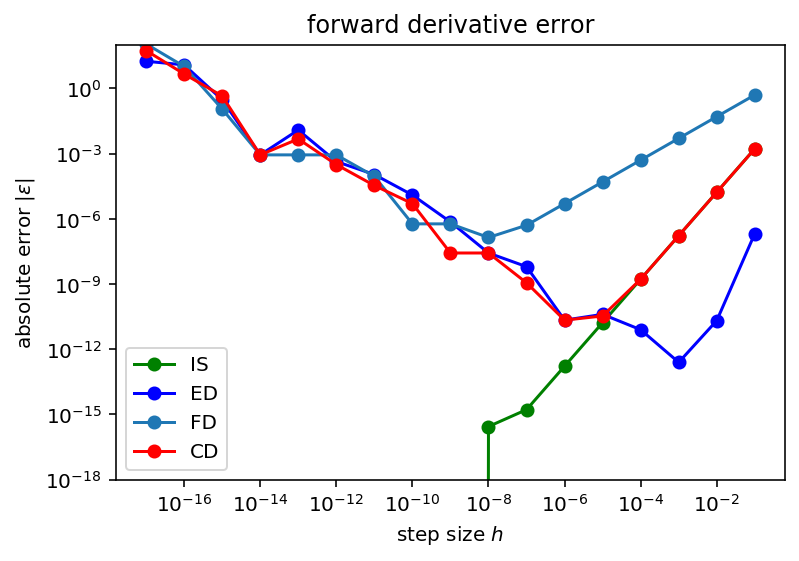

In [10]:
%matplotlib inline
from matplotlib.pyplot import loglog, xlabel, ylabel, title, legend, ylim
import matplotlib.pyplot as plt
from numpy import *


def fderivative(f, a, h):
    return (f(a + h) - f(a)) / h


def cderivative(f, a, h):
    return (f(a + h) - f(a - h)) / (2 * h)


def extrapdiff(f, a, h):
    return (1 / 3) * ((4 * (cderivative(f, a, 0.5 * h))) - (cderivative(f, a, h)))


def IS(f, x, h):
    return (f(x + 1j * h)).imag / h


print(extrapdiff(cos, 0, 1))

test_f1 = cos
test_f2 = e
x0 = 0.1
fx0p_1 = 0.09983341664  # put the true value of the derivative of test_f at x0 here
fx0p_1 = sin(x0)
print(fx0p_1)
fx0p_2 = 'something'

hh = logspace(-1, -17, 17)  # same syntax as linspace: this gives us a range from 10^-1 to 10^-17 with 17 points.

fd_errors = []
fd_estimate = []
cd_errors = []
cd_estimate = []
ed_estimate = []
ed_errors = []
IS_estimate = []
IS_errors = []
x = []

for h in hh:

    fd_estimate.append([h, fderivative(test_f1, x0, h)])
    festimate = fderivative(test_f1, x0, h)
    fd_errors.append((abs(festimate) - fx0p_1) / fx0p_1)

    cd_estimate.append([h, cderivative(test_f1, x0, h)])
    cestimate = cderivative(test_f1, x0, h)
    cd_errors.append(abs((abs(cestimate) - fx0p_1) / fx0p_1))

    ed_estimate.append([h, extrapdiff(test_f1, x0, h)])
    eestimate = extrapdiff(test_f1, x0, h)
    ed_errors.append(abs((abs(eestimate) - fx0p_1) / fx0p_1))
    
    IS_estimate.append([h, IS(test_f1, x0, h)])
    ISestimate = IS(test_f1, x0, h)
    IS_errors.append(abs((abs(ISestimate) - fx0p_1) / fx0p_1))

loglog(hh, IS_errors, 'go-', label="IS")
loglog(hh, ed_errors, 'bo-', label="ED")
loglog(hh, fd_errors, 'o-', label="FD")
loglog(hh, cd_errors, 'ro-', label="CD")  # Same syntax as plot. The label is used in the legend.
xlabel('step size $h$')  # Note that we can include LaTeX-style maths within dollar signs.
ylim(10**(-18), 10**2, 23)
ylabel('absolute error $|\epsilon|$')
title('forward derivative error')  # Include an appropriate string for a graph title here.
legend()


maximum accuracy
CD & ED: h = 10**-6
FD: 10**-8

at extremely low values of h, the error goes up rather then continuing to decrease.
this could be due to rounding

**Open a new markdown cell and answer the following questions**
- Where is each algorithm most accurate?
- Can you identify which sorts of error occur elsewhere?**

Once you have your code working, it may be useful to write your code in a way that allows you to easily change the function being differentiated and the value of $x$ where the derivative is evaluated.  This provides some additional testing of the code and makes it easy to reuse (e.g., quiz questions often involve modifying your code to solve a slightly different problem).

▶ **CHECKPOINT 3**

## Extension: *Imaginary step* algorithm

The *imaginary step* algorithm is

$$
f'(x, h)_\text{IS} = \frac{\mathrm{Im}\{f(x + \mathrm{i}h)\}}{h}
$$

where $\mathrm{Im}$ represents the imaginary part of a number; this only works if $f$ is a *real* function. This looks extraordinarily bizarre on the face of it, but can be shown to work using Taylor series in much the same way as we did in class for the other algorithms.

**Code a function `IS(f, x, h)` to calculate the derivative using this method. Is it more or less accurate than the other methods we have discussed? Can you see why?**

*Hint*: The number $2 + 3\mathrm{i}$ is written in Python as `2 + 3j`. If `z` is a complex number in Python, its imaginary part is `z.imag`. That is, `1j` is the unit imaginary number in Python and can be used in mathematical expressions. For example, pure imaginary numbers may be created via `d*1j` where `d` is a pure real variable.

For more information about this algorithm, you might like to see [this informal blog post](https://sinews.siam.org/Details-Page/differentiation-without-a-difference) or a [more formal paper](https://core.ac.uk/download/pdf/230397657.pdf) (section 2.1 is most relevant for our purposes).

In [7]:
def IS(f, x, h):
    return (f(x + 1j * h)).imag / h
def f(x):
    return cos*()
print(IS(cos, 0.1, 0.1))

#its less accurate, idk why lol... yet :)

-0.0999998888888977
